START

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/input2/train.csv')

In [3]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = digits.drop('label', axis=1)
y = digits['label']

In [5]:
x2 = x.values.reshape(-1, 28, 28, 1) # Reshape to (num_samples, height, width, channels)

In [6]:
x2.shape

(42000, 28, 28, 1)

this image is: 4


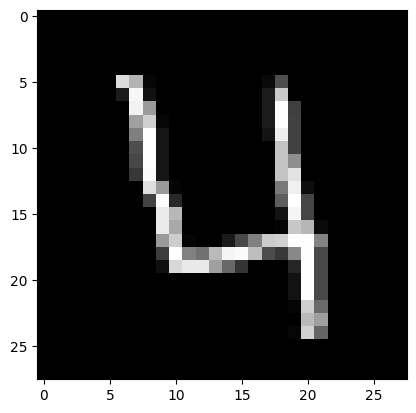

In [7]:
plt.imshow(x2[3], cmap='gray')
print('this image is: ' +str(y[3]))

this image's observation no. is : 20805
this image is: 3


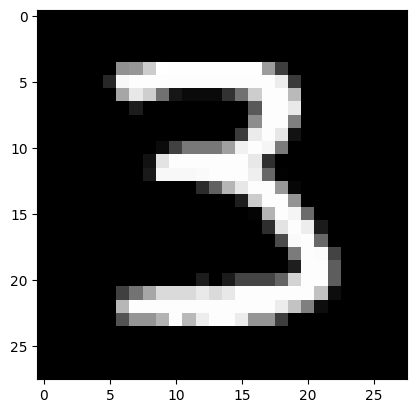

In [8]:
from random import randrange
index = randrange(42000)

plt.imshow(x2[index] , cmap='gray')
print("this image's observation no. is : " +str(index))
print('this image is: ' +str(y[index]))

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state = 2000)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
predictions =  model.predict(x_test)
accuracy = model.score(x_test , y_test)
accuracy = "{:.0%}".format(accuracy)
print('Accuracy of classification is : ' +str(accuracy))

Accuracy of classification is : 91%


In [13]:
x_test2 = x_test.values.reshape(-1,28,28,1)
x_test2.shape

(8400, 28, 28, 1)

actual number is 7
the classification for this no. is 7


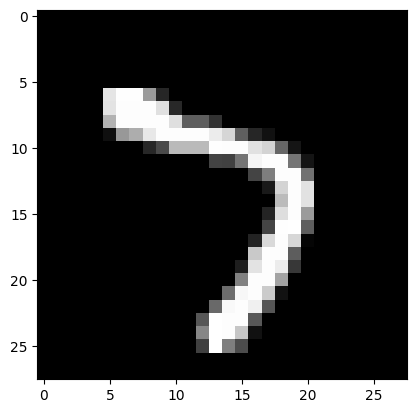

In [14]:
# plt.imshow(x_test2[0] , cmap='gray')

index = randrange(8400)
plt.imshow(x_test2[index] , cmap='gray')
print('actual number is ' + str(y_test.iloc[index]))
print('the classification for this no. is ' + str(model.predict(x_test)[index]))

Plotting confusion matrix

In [15]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test , predictions)

<Axes: >

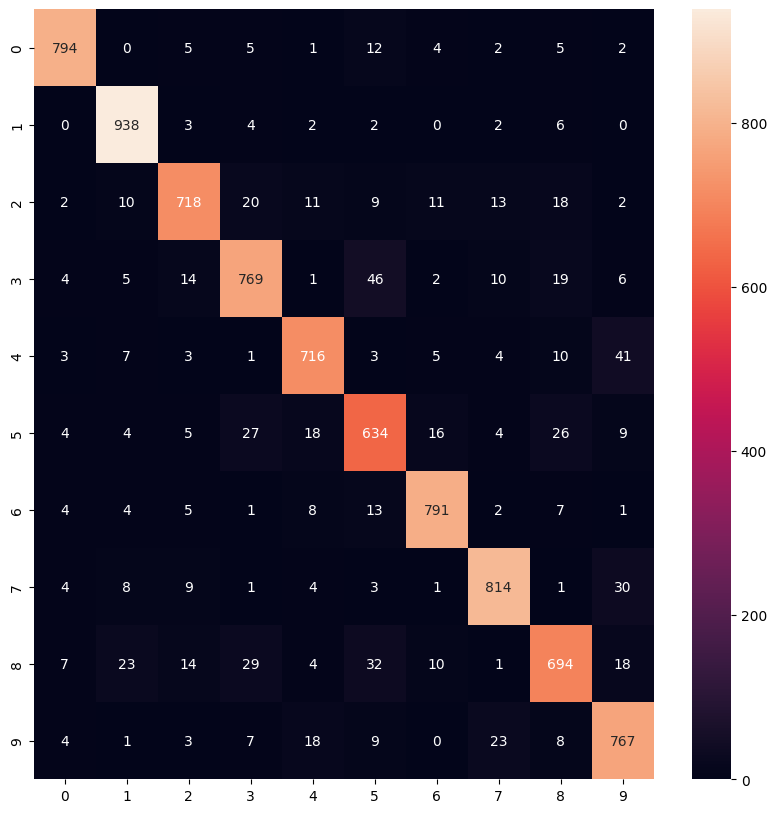

In [16]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix , annot = True , fmt = 'd')